# Text Preprocessing with NLTK and spaCy

**Objective:** Understand and apply essential text preprocessing techniques using Python's NLTK and spaCy libraries to prepare raw text data for machine learning models and analysis.

**Case Study:** Text Mining for Analyzing Documents

In this notebook, we will explore how to clean, normalize, and structure raw text data from various sources. Effective text preprocessing is a fundamental step in Natural Language Processing (NLP) and is crucial for tasks like text classification, sentiment analysis, information retrieval, and topic modeling. We will use a case study approach, imagining we are preparing a collection of documents (like resumes, speeches, or long articles) for analysis.

## 1. Introduction: Why Text Preprocessing?

Text data is unstructured and often noisy. Computers don't understand text directly; they work with numbers. Text preprocessing transforms raw text into a format that can be processed by machine learning algorithms. This involves:

- **Cleaning:** Removing unwanted characters, symbols, and noise.
- **Normalization:** Converting text to a standard format (e.g., lowercase).
- **Tokenization:** Breaking text into smaller units (words, sentences).
- **Reducing Inflection:** Bringing words to their base or root form (stemming, lemmatization).
- **Identifying Structure/Meaning:** Extracting parts of speech, named entities.

We will focus on two powerful Python libraries for NLP:

- **NLTK (Natural Language Toolkit):** A comprehensive library often used for teaching and research, providing access to many corpora and lexical resources.
- **spaCy:** An industrial-strength library designed for efficiency and speed, particularly good for production use cases and offering pre-trained models for various languages.

# NLTK vs. spaCy: Pros, Cons and Comparison

Both NLTK and spaCy are powerful Python libraries for Natural Language Processing, but they are designed with different philosophies and strengths. Understanding their differences helps in choosing the right tool for a specific task, especially in data science and machine learning projects.

## Comparison Table

| Feature                | NLTK (Natural Language Toolkit)                                                                                                                              | spaCy                                                                                                                         |
| :--------------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------- | :---------------------------------------------------------------------------------------------------------------------------- |
| **Primary Focus**      | Research, Education, Experimentation                                                                                                                         | Production, Industry Use, Efficiency                                                                                          |
| **Speed**              | Generally **slower for core tasks like tokenization, POS, NER. **                                                                                            | Generally faster for core tasks, built for performance.                                                                       |
| **Functionality**      | Very broad range of algorithms, corpora, and lexical resources.                                                                                              | Focused on providing efficient, accurate core NLP functionalities.                                                            |
| **Architecture**       | Modular; user often chains together individual components.                                                                                                   | Pipeline-based; core functionalities are integrated.                                                                          |
| **Ease of Use (Core)** | Requires more manual steps (e.g., explicit POS tagging for lemmatization).                                                                                   | More opinionated and streamlined API for common tasks.                                                                        |
| **Models/Resources**   | Extensive collection of corpora, grammars, treebanks, etc.                                                                                                   | Pre-trained statistical models for various languages (tuned for accuracy & speed).                                            |
| **Core Tasks**         | Provides _building blocks_ for tokenization, stemming, lemmatization, POS tagging, parsing, etc.                                                             | Provides _integrated functions_ for tokenization, POS tagging, lemmatization, NER, dependency parsing.                        |
| **Specific Strengths** | Great for learning, linguistic analysis, exploring different algorithms, access to many datasets (like WordNet, Brown Corpus). Includes VADER for sentiment. | Excellent NER, dependency parsing, tokenization (handles contractions well), robust and efficient for processing large texts. |
| **Setup**              | Requires downloading specific datasets/models after installation.                                                                                            | Requires downloading a specific language model (`spacy download en_core_web_sm`).                                             |
| **Community**          | Older, very large community, vast resources.                                                                                                                 | Active and growing community, excellent, well-structured documentation.                                                       |
| **Parsing**            | Supports constituency and dependency parsing.                                                                                                                | Primarily focuses on highly accurate dependency parsing and noun chunks.                                                      |
| **Extensibility**      | Easy to swap out algorithms, implement custom approaches.                                                                                                    | Offers custom components and extensions, but typically within its pipeline structure.                                         |

## 2. Setting up the Environment

First, we need to install the necessary libraries and download required data.


In [1]:

# Install necessary libraries
!pip install -q nltk spacy docx2txt pandas matplotlib wordcloud

# Download NLTK data
import nltk
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stop words
nltk.download('wordnet')      # For lemmatization
nltk.download('averaged_perceptron_tagger') # For POS tagging
nltk.download('omw-1.4')      # For WordNet data
nltk.download('punkt_tab')    # Download the missing resource for sentence tokenization


# Download spaCy model
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sanketmishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.2 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


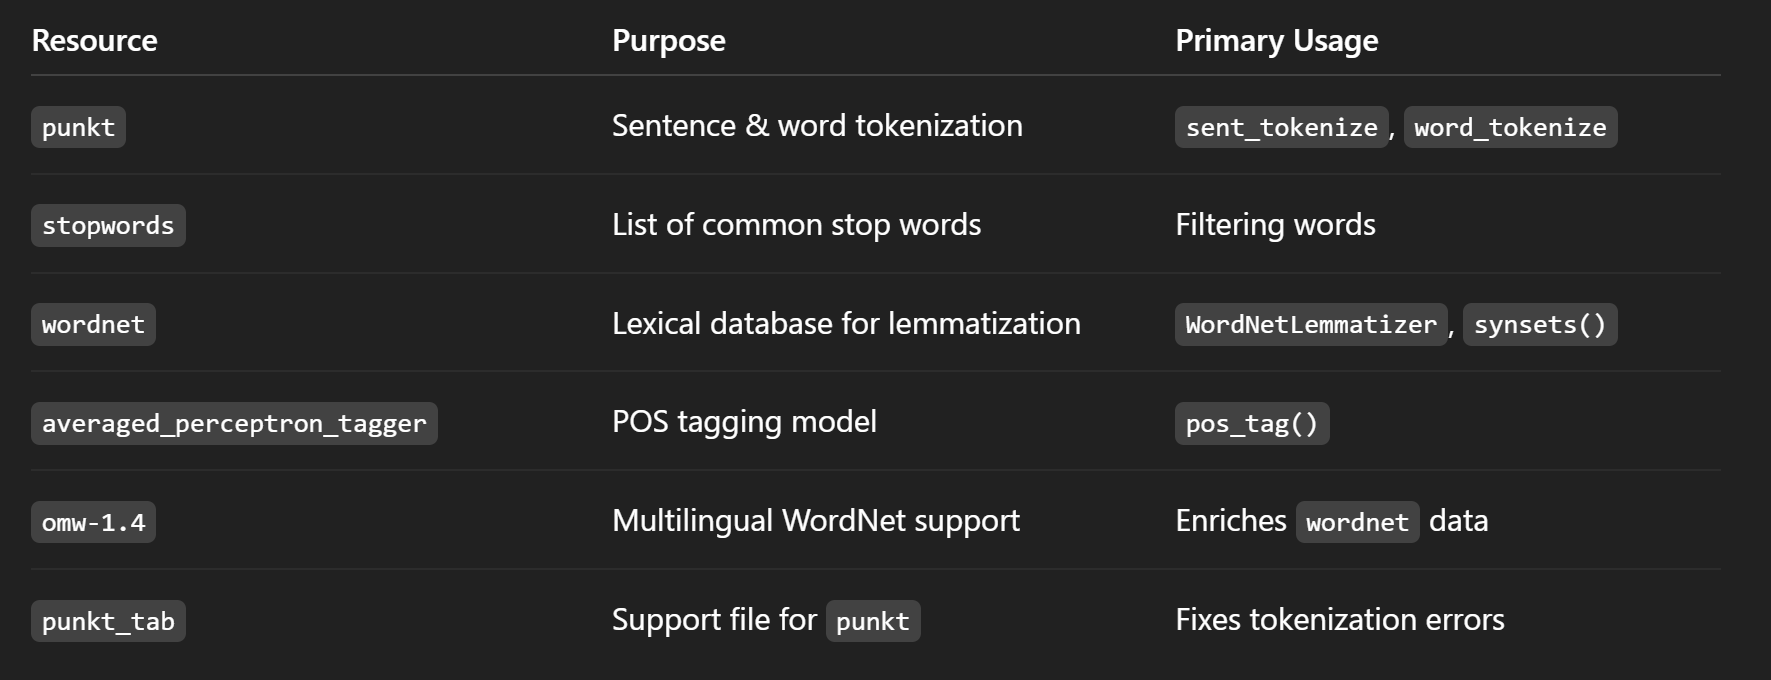


## 3. Data Loading

In a real-world scenario, text data can come from various sources like text files (.txt), PDFs (.pdf), CSVs (.csv), Word documents (.docx), databases, or web scraping.

For this notebook, we will primarily work with a sample text string to demonstrate the preprocessing steps clearly. However, let's briefly touch upon loading from different formats.

- **.txt files:** Standard file reading (`open('filename.txt', 'r').read()`).
- **.csv files:** Using pandas (`pandas.read_csv('filename.csv')`).
- **.pdf files:** Requires libraries like `PyPDF2` or `pdfminer.six`.
- **.docx files:** Requires libraries like `python-docx` or `docx2txt`.
- **Databases/Web:** Requires database connectors (e.g., `psycopg2`, `sqlite3`) or web scraping libraries (`requests`, `BeautifulSoup`).

Let's create a sample text for our case study. This text is loosely based on the "machine learning from Wikipedia" idea mentioned in the prompt.


In [26]:
# Sample text representing a part of a document
sample_document = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, machine learning is also referred to as predictive analytics.
"""


In [27]:
# Let's also add some text with punctuation, numbers, and mixed casing
noisy_text = """
Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!).
Visit our site: http://example.com for more info.
This is awesome!!! We collected 1,234 data points.
Softbank and Google are major players.
"""

In [28]:
print("--- Sample Document ---")
print(sample_document)
print("\n--- Noisy Text ---")
print(noisy_text)


######
### Note: For loading .docx files, you would typically do:

# import docx2txt
# try:
#     text = docx2txt.process("your_document.docx")
#     print(text)
# except Exception as e:
#     print(f"Error loading docx: {e}")


--- Sample Document ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

In its application across business problems, mach

## 4. Initial Text Cleaning

Raw text often contains noise like punctuation, numbers, special characters, URLs, and inconsistent casing. Cleaning involves removing or standardizing these elements.

We'll combine the sample texts for cleaning demonstration.


In [29]:
import re
import string

# Combine texts
raw_text = sample_document + "\n" + noisy_text

print("Original Raw Text Length:", len(raw_text))
print("--- --------------------------- ---")
print("--- Original Raw Text ---")
print(raw_text)

Original Raw Text Length: 1254
--- --------------------------- ---
--- Original Raw Text ---

Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. Mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsu

### 1. Convert to Lowercase

Words like "Apple" and "apple" are treated as different tokens by most models, even though they usually mean the same thing.If you lowercase:

Both become "apple", improving feature consistency.


In [30]:
cleaned_text = raw_text.lower()

print("\n--- After Lowercasing ---")
print(cleaned_text)


--- After Lowercasing ---

machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, m

### 2. Remove URLs (using regex)

A retail company collects reviews:
"I loved this dress! Check it out here: https://abc.com/dress/123"
If you don’t remove the URL:

Model may falsely associate the product sentiment with random URLs.
Inconsistent patterns reduce accuracy.

#### Use the following prompt in GPT

- Write a Python regular expression that matches
  URLs starting with "http://" or "https://", followed by one or more characters that can include letters,
  digits, special characters like $-\_@.&+, !\*(),, or percent-encoded characters like %20. Use re.compile() to compile the pattern.


#### url_pattern = re.compile(

    r'http[s]?://'  # Match "http://" or "https://"
    r'(?:'
        r'[a-zA-Z]'        # Match any letter (uppercase or lowercase)
        r'|'
        r'[0-9]'           # Match any digit
        r'|'
        r'[$-_@.&+]'       # Match any of the listed special characters
        r'|'
        r'[!*\\(\\),]'     # Match other allowed characters (escaped)
        r'|'
        r'(?:%[0-9a-fA-F][0-9a-fA-F])'  # Match percent-encoded characters
    r')+'

####)


In [31]:
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)


In [32]:
print(remove_urls(cleaned_text))


machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems, machine learning is also ref

In [33]:

url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  #For now we can generate this regex using ChatGPT else you can use this link for reference https://regex101.com/library/OY96XI


cleaned_text = url_pattern.sub(r'', cleaned_text)
print("\n--- After Removing URLs ---")
print(cleaned_text)


--- After Removing URLs ---

machine learning (ml) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data. algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.

machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. a subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers. mathematical optimization delivers methods, theory and application domains to the field of machine learning. data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.

in its application across business problems,

### 3. Remove punctuation (using string.punctuation and translate)


In [34]:
# string.punctuation includes !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

translator = str.maketrans('', '', string.punctuation)

# This line creates a translation table that tells Python which characters to delete from a string.

# str.maketrans(from, to, delete) creates a mapping for str.translate().

#In this case:

# from = '' and to = '': no character substitutions.

# delete = string.punctuation: remove all punctuation characters.

In [35]:
trans = str.maketrans("aeiou", "12345")
# Explanation:
#"a" → "1", "e" → "2", "i" → "3", "o" → "4", "u" → "5"
text = "education"
translated = text.translate(trans)
print(translated)

2d5c1t34n


In [36]:



cleaned_text = cleaned_text.translate(translator)
print("\n--- After Removing Punctuation ---")
print(cleaned_text)


--- After Removing Punctuation ---

machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task

machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning

in its application across business problems machine le

### 4. Remove numbers (using regex)

### Removes digits (0-9)


In [37]:
"""
re.sub(pattern, replacement, text)
→ Substitutes all matches of the pattern with the replacement string ('' here).
"""

cleaned_text = re.sub(r'\d+', '', cleaned_text)#Removes all numbers (whole or part of numbers) from the text.


print("\n--- After Removing Numbers ---")
print(cleaned_text)


--- After Removing Numbers ---

machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task

machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning

in its application across business problems machine learni

### 5. Remove extra whitespace (including newlines and multiple spaces)

### Replace multiple spaces with a single space


In [38]:

cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
print("\n--- After Removing Extra Whitespace ---")
print(cleaned_text)


--- After Removing Extra Whitespace ---
machine learning ml is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data algorithms build a mathematical model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to perform the task machine learning algorithms are used in a wide variety of applications such as email filtering and computer vision where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers mathematical optimization delivers methods theory and application domains to the field of machine learning data mining is a related field of study focusing on exploratory data analysis through unsupervised learning in its application across business problems machine 

In [39]:
print("\nCleaned Text Length:", len(cleaned_text))

# Note: Removing non-English words is more complex and often involves language detection libraries or checking words against a dictionary.



Cleaned Text Length: 1186


# 5. Tokenization

**Tokenization** is the process of breaking down a text into individual units called tokens. These tokens can be words, sentences, or even sub-word units.

**5.1 Sentence Tokenization**
Splitting text into sentences. Useful for tasks that require sentence-level analysis.


In [40]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
from nltk.tokenize import sent_tokenize
import spacy

# Load the small English spaCy model
nlp = spacy.load('en_core_web_sm')



In [42]:
# Using NLTK
nltk_sentences = sent_tokenize(raw_text) # Using raw_text to show sentence boundary handling
print("--- Sentence Tokenization (NLTK) ---")
for i, sentence in enumerate(nltk_sentences):
    print(f"Sentence {i+1}: {sentence}")




--- Sentence Tokenization (NLTK) ---
Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.
Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data analys

In [43]:
# Using spaCy
# spaCy processes text as a Doc object, which has sentences built-in
"""
nlp is the SpaCy language model pipeline you’ve loaded (e.g., nlp = spacy.load("en_core_web_sm")).

raw_text is the original, unprocessed text you want to analyze.

When you call nlp(raw_text), SpaCy processes the text through its pipeline:

Tokenization

Part-of-speech tagging

Named entity recognition

Lemmatization

Dependency parsing, etc.

The result is a Doc object (spacy_doc_raw) which is a container of tokens and their linguistic annotations.
"""
spacy_doc_raw = nlp(raw_text) # Using raw_text
spacy_sentences = [sent.text for sent in spacy_doc_raw.sents]
print("\n--- Sentence Tokenization (spaCy) ---")
for i, sentence in enumerate(spacy_sentences):
    print(f"Sentence {i+1}: {sentence}")


--- Sentence Tokenization (spaCy) ---
Sentence 1: 
Machine learning (ML) is a field of study in artificial intelligence concerned with the development of computer algorithms that can learn from and make predictions on data.
Sentence 2: Algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.


Sentence 3: Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.
Sentence 4: A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers.
Sentence 5: Mathematical optimization delivers methods, theory and application domains to the field of machine learning.
Sentence 6: Data mining is a related field of study, focusing on exploratory data an

---
- spaCy's sentence tokenization is part of its processing pipeline and is generally robust.

- NLTK's `sent_tokenize` is also widely used.
---


### 5.2 Word Tokenization

Splitting text into individual words or terms. This is often the first step after cleaning.


In [44]:
from nltk.tokenize import word_tokenize

# Using NLTK (on the cleaned text)
nltk_word_tokens = word_tokenize(cleaned_text)
print("--- Word Tokenization (NLTK) ---")
print(nltk_word_tokens[:20]) # Print first 20 tokens

--- Word Tokenization (NLTK) ---
['machine', 'learning', 'ml', 'is', 'a', 'field', 'of', 'study', 'in', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'development', 'of', 'computer', 'algorithms', 'that', 'can']


In [45]:
# Using spaCy (on the cleaned text)
# spaCy's Doc object already contains tokens
spacy_doc_cleaned = nlp(cleaned_text)
spacy_word_tokens = [token.text for token in spacy_doc_cleaned]
print("\n--- Word Tokenization (spaCy) ---")
print(spacy_word_tokens[:20]) # Print first 20 tokens



--- Word Tokenization (spaCy) ---
['machine', 'learning', 'ml', 'is', 'a', 'field', 'of', 'study', 'in', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'development', 'of', 'computer', 'algorithms', 'that', 'can']


-------------

1.   SpaCy's tokenizer handles contractions and punctuation attached to words more gracefully than NLTK's basic `word_tokenize`, which might separate them.
2.   SpaCy tokens also contain rich information (POS tags, lemmas, etc.) directly.



---


# 6. Stop Word Removal

Stop words are common words (like 'the', 'is', 'in', 'and') that often do not carry significant meaning for analysis and can be removed to reduce noise and dimensionality.


In [46]:
from nltk.corpus import stopwords

# Get English stop words from NLTK
nltk_stop_words = set(stopwords.words('english'))
print("--- Sample NLTK Stop Words ---")
print(list(nltk_stop_words)[:10])


--- Sample NLTK Stop Words ---
['nor', 'ma', 'or', 'the', 'it', 'couldn', 'these', 'between', 'by', 'theirs']


In [47]:
# Remove stop words using NLTK tokens
nltk_tokens_no_stopwords = [word for word in nltk_word_tokens if word not in nltk_stop_words]
print("\n--- NLTK Tokens after Stop Word Removal ---")
print(nltk_tokens_no_stopwords[:20])


--- NLTK Tokens after Stop Word Removal ---
['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'computer', 'algorithms', 'learn', 'make', 'predictions', 'data', 'algorithms', 'build', 'mathematical', 'model', 'based']


In [48]:
# SpaCy tokens have an `is_stop` attribute
# token.is_stop is a built-in boolean property that checks if the token is a stop word (like "the", "is", "and", etc.).
spacy_tokens_no_stopwords = [token.text for token in spacy_doc_cleaned if not token.is_stop]
print("\n--- spaCy Tokens after Stop Word Removal ---")
print(spacy_tokens_no_stopwords[:20])


--- spaCy Tokens after Stop Word Removal ---
['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'computer', 'algorithms', 'learn', 'predictions', 'data', 'algorithms', 'build', 'mathematical', 'model', 'based', 'sample']


---



*  Both NLTK and spaCy provide lists of stop words.
* Removing them helps focus on the more meaningful terms in the text.


---


In [49]:
from collections import Counter
# Step 5: Count word frequencies
word_counts = Counter(spacy_tokens_no_stopwords)

# Display word counts
print(word_counts)

Counter({'learning': 7, 'machine': 6, 'data': 6, 'algorithms': 4, 'field': 3, 'predictions': 3, 'study': 2, 'computer': 2, 'mathematical': 2, 'perform': 2, 'related': 2, 'application': 2, 'ml': 1, 'artificial': 1, 'intelligence': 1, 'concerned': 1, 'development': 1, 'learn': 1, 'build': 1, 'model': 1, 'based': 1, 'sample': 1, 'known': 1, 'training': 1, 'order': 1, 'decisions': 1, 'explicitly': 1, 'programmed': 1, 'task': 1, 'wide': 1, 'variety': 1, 'applications': 1, 'email': 1, 'filtering': 1, 'vision': 1, 'difficult': 1, 'infeasible': 1, 'develop': 1, 'conventional': 1, 'needed': 1, 'tasks': 1, 'subset': 1, 'closely': 1, 'computational': 1, 'statistics': 1, 'focuses': 1, 'making': 1, 'computers': 1, 'optimization': 1, 'delivers': 1, 'methods': 1, 'theory': 1, 'domains': 1, 'mining': 1, 'focusing': 1, 'exploratory': 1, 'analysis': 1, 'unsupervised': 1, 'business': 1, 'problems': 1, 'referred': 1, 'predictive': 1, 'analytics': 1, 'rocks': 1, 'revolutionizing': 1, 'world': 1, 'visit': 1

# 7. Stemming and Lemmatization

These techniques reduce words to their root form to group together different inflections of the same word (e.g., "running", "runs", "ran" -> "run"). This helps in standardizing vocabulary.

**Stemming:** A heuristic process that cuts off the ends of words. It's faster but can result in non-dictionary words (e.g., "automate" from "automatically").

**Lemmatization:** A more sophisticated process that uses a vocabulary and morphological analysis to return the base or dictionary form of a word (known as the lemma). It's slower but produces actual words (e.g., "better" -> "good"). Lemmatization often requires the Part-of-Speech (POS) tag of the word to be accurate.


In [50]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
# nltk, spacy are already imported


# --- Stemming with NLTK (PorterStemmer) ---
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in nltk_tokens_no_stopwords] # Apply to NLTK tokens after stop word removal

print("--- Stemmed Tokens (NLTK PorterStemmer) ---")
print(stemmed_tokens[:20])



--- Stemmed Tokens (NLTK PorterStemmer) ---
['machin', 'learn', 'ml', 'field', 'studi', 'artifici', 'intellig', 'concern', 'develop', 'comput', 'algorithm', 'learn', 'make', 'predict', 'data', 'algorithm', 'build', 'mathemat', 'model', 'base']


In [51]:

# --- Lemmatization with spaCy ---

# Extract lemmas from spaCy Doc object (on cleaned text, filtering stop words)
spacy_lemmatized_tokens = [token.lemma_ for token in spacy_doc_cleaned if not token.is_stop]

print("\n--- Lemmatized Tokens (spaCy) ---")
print(spacy_lemmatized_tokens[:20])

# Note: spaCy's lemmatizer is generally more accurate as it uses context and
# doesn't require manual POS tag conversion like NLTK's WordNetLemmatizer


--- Lemmatized Tokens (spaCy) ---
['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concern', 'development', 'computer', 'algorithm', 'learn', 'prediction', 'datum', 'algorithm', 'build', 'mathematical', 'model', 'base', 'sample']


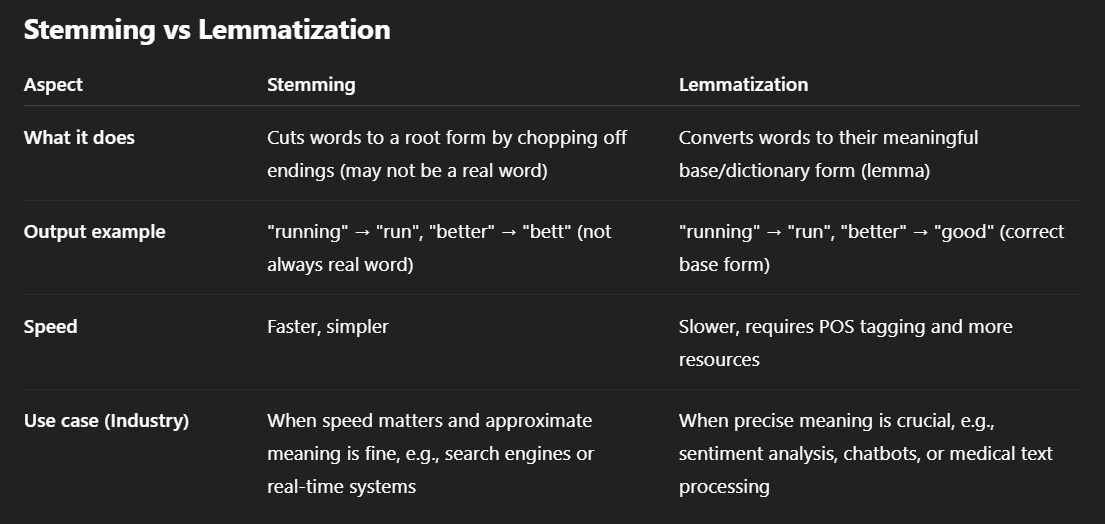


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [ ]:
# Sample noisy texts
texts = [
    "Machine learning rocks! It's revolutionizing the world in 2023 (and beyond!). Visit our site: http://example.com for more info.",
    "This is awesome!!! We collected 1,234 data points.",
    "Softbank and Google are major players.",
    "Predictive analytics uses machine learning to solve business problems.",
]

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Process text with SpaCy
    doc = nlp(text)

    # Lemmatization + remove stopwords + tokens length > 1 (to skip leftover punct or spaces)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 1]

    # Join back to string
    cleaned_text = " ".join(tokens)
    return cleaned_text

cleaned_texts = [clean_text(text) for text in texts]

print("Cleaned Texts:")
for i, txt in enumerate(cleaned_texts, 1):
    print(f"{i}: {txt}")


Cleaned Texts:
1: machine learning rock revolutionize world beyond visit site info
2: awesome collect data point
3: softbank google major player
4: predictive analytic use machine learn solve business problem


# Bag of Words (BoW)


1. Bag of Words (BoW)
   What it is:
   BoW converts text into a vector of word counts — it ignores grammar and word order, just focuses on how often each word appears.

How it works:

Create a vocabulary of all unique words.

Represent each document by counting how many times each word occurs.

Industry Example:
In spam detection, BoW helps count words like "free", "win", "offer". Spam emails tend to use these more often — the model learns this pattern.


In [ ]:
# Using sklearn CountVectorizer for BoW
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(cleaned_texts)




In [ ]:
print("BoW Feature Names:", vectorizer.get_feature_names_out())



BoW Feature Names: ['analytic' 'awesome' 'beyond' 'business' 'collect' 'data' 'google' 'info'
 'learn' 'learning' 'machine' 'major' 'player' 'point' 'predictive'
 'problem' 'revolutionize' 'rock' 'site' 'softbank' 'solve' 'use' 'visit'
 'world']


In [ ]:
print("\nBoW Matrix (Count of words per document):")
bow_matrix.toarray()


BoW Matrix (Count of words per document):


array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0]])

In [ ]:
# Get feature names and TF-IDF matrix values
feature_names =vectorizer.get_feature_names_out()
bow_values = bow_matrix.toarray()

# Create a DataFrame
bow_df = pd.DataFrame(bow_values, columns=feature_names)

# Add row indices as Document IDs
bow_df.index = [f"Doc_{i+1}" for i in range(len(bow_df))]

# Display the DataFrame
print("\nTF-IDF DataFrame:")
bow_df.round(3)  # Optional: round for readability


TF-IDF DataFrame:


,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
Doc_1,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,1,0,0,0,1,1
Doc_2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc_3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Doc_4,1,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,1,0,0


# TF-IDF (Term Frequency - Inverse Document Frequency)


📊 2. TF-IDF (Term Frequency – Inverse Document Frequency)
What it is:
TF-IDF weighs words by how important they are to a document relative to all other documents.

How it works:

TF (Term Frequency): How often a word appears in a document.

IDF (Inverse Document Frequency): Gives less weight to common words across all documents (like “the”, “is”), and more to rare but important ones.

Industry Example:
In resume ranking, TF-IDF gives more weight to unique skills (e.g., "TensorFlow", "NLP") that appear in the job description and not in every resume — helping identify better-matching candidates.


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix (weights per word per document):")
print(tfidf_matrix.toarray())


TF-IDF Feature Names: ['analytic' 'awesome' 'beyond' 'business' 'collect' 'data' 'google' 'info'
 'learn' 'learning' 'machine' 'major' 'player' 'point' 'predictive'
 'problem' 'revolutionize' 'rock' 'site' 'softbank' 'solve' 'use' 'visit'
 'world']

TF-IDF Matrix (weights per word per document):
[[0.         0.         0.34056989 0.         0.         0.
  0.         0.34056989 0.         0.34056989 0.26850921 0.
  0.         0.         0.         0.         0.34056989 0.34056989
  0.34056989 0.         0.         0.         0.34056989 0.34056989]
 [0.         0.5        0.         0.         0.5        0.5
  0.         0.         0.         0.         0.         0.
  0.         0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         0.         0.         0.         0.5
  0.5        0.         0.         0.         0.         0.
  0.         0.

In [ ]:
# Get feature names and TF-IDF matrix values
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()
# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_values, columns=feature_names)

# Add row indices as Document IDs
tfidf_df.index = [f"Doc_{i+1}" for i in range(len(tfidf_df))]

# Display the DataFrame
print("\nTF-IDF DataFrame:")
tfidf_df.round(3)  # Optional: roun


TF-IDF DataFrame:


,analytic,awesome,beyond,business,collect,data,google,info,learn,learning,...,predictive,problem,revolutionize,rock,site,softbank,solve,use,visit,world
Doc_1,0.000,0.0,0.341,0.000,0.0,0.0,0.0,0.341,0.000,0.341,...,0.000,0.000,0.341,0.341,0.341,0.0,0.000,0.000,0.341,0.341
Doc_2,0.000,0.5,0.000,0.000,0.5,0.5,0.0,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
Doc_3,0.000,0.0,0.000,0.000,0.0,0.0,0.5,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.5,0.000,0.000,0.000,0.000
Doc_4,0.362,0.0,0.000,0.362,0.0,0.0,0.0,0.000,0.362,0.000,...,0.362,0.362,0.000,0.000,0.000,0.0,0.362,0.362,0.000,0.000


# Summary


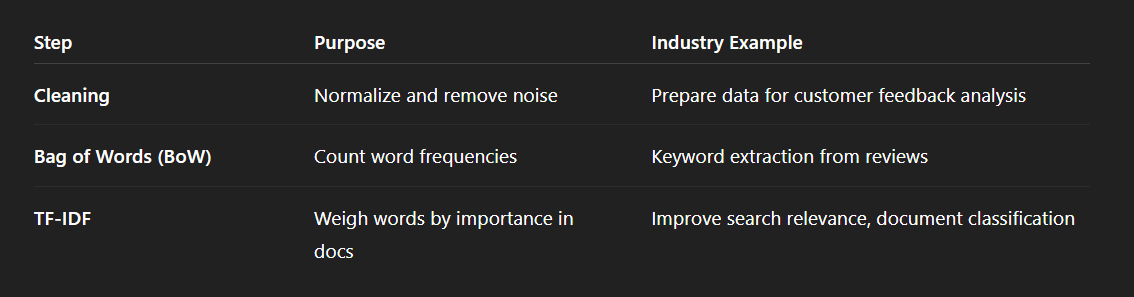


# Session 2


## 8. Part-of-Speech (POS) Tagging

POS tagging is the process of assigning a grammatical category (like noun, verb, adjective) to each word in a sentence. This is useful for understanding the structure and meaning of text and is often a precursor to other tasks like chunking or dependency parsing.


In [ ]:
# nltk, spacy are already
# spacy_doc_cleaned is already created in 5.2

# Using spaCy (on the cleaned text Doc object)
print("\n--- POS Tagging with spaCy ---")
# spaCy tokens have .pos_ (coarse-grained) and .tag_ (fine-grained) attributes
for i, token in enumerate(spacy_doc_cleaned):
    print(f"{token.text}: {token.pos_} ({token.tag_})")
    if i >= 20: break # Limit output

# SpaCy's POS tagging is part of its standard pipeline and is generally very accurate.
# It provides both coarse-grained (`.pos_`) and fine-grained (`.tag_`) POS tags.


--- POS Tagging with spaCy ---

: SPACE (_SP)
machine: NOUN (NN)
learning: NOUN (NN)
ml: PROPN (NNP)
is: AUX (VBZ)
a: DET (DT)
field: NOUN (NN)
of: ADP (IN)
study: NOUN (NN)
in: ADP (IN)
artificial: ADJ (JJ)
intelligence: NOUN (NN)
concerned: VERB (VBN)
with: ADP (IN)
the: DET (DT)
development: NOUN (NN)
of: ADP (IN)
computer: NOUN (NN)
algorithms: NOUN (NNS)
that: PRON (WDT)
can: AUX (MD)


## 9. Shallow Parsing (Chunking)

Shallow parsing, also known as chunking, groups words into meaningful phrases (like Noun Phrases, Verb Phrases) based on their POS tags. It adds more structure than just POS tagging but doesn't provide a full parse tree like constituency or dependency parsing.

SpaCy can identify "noun chunks" as part of its default pipeline.


In [ ]:
# Using spaCy to find noun chunks
print("--- Noun Chunking with spaCy ---")
for chunk in spacy_doc_cleaned.noun_chunks:
    print(chunk.text)

# SpaCy's noun chunker is a simple form of shallow parsing.
# More complex chunking (e.g., identifying verb phrases) can be done by defining patterns
# or using libraries specifically for chunking with NLTK or spaCy extensions.


--- Noun Chunking with spaCy ---

machine learning ml
a field
study
artificial intelligence
the development
computer algorithms
that
predictions
data algorithms
a mathematical model
sample data
data
order
predictions
decisions
the task

machine learning algorithms
a wide variety
applications
email filtering and computer vision
it
conventional algorithms
the needed tasks
a subset
machine learning
computational statistics
which
predictions
computers
mathematical optimization
methods theory
application domains
the field
data mining
a related field
study
exploratory data analysis
unsupervised learning
its application
business problems machine learning
predictive analytics


machine learning
the world
our site
more info
this
we
data points
softbank
google
major players


## 10. Entity Recognition (NER)

Named Entity Recognition (NER) is the process of identifying and classifying named entities in text into predefined categories such as person names, organizations, locations, dates, etc. This is crucial for extracting structured information from unstructured text.

SpaCy has excellent built-in NER capabilities.


In [ ]:
# spacy is already imported
# spacy_doc_raw is already created

# Using spaCy for Named Entity Recognition
print("--- Named Entity Recognition (NER) with spaCy ---")
for ent in spacy_doc_raw.ents: # Accessing .ents attribute for detected entities
    if ent.label_ in ['ORG', 'GPE', 'PERSON', 'DATE', 'CARDINAL', 'LOC']: # Filter for common entity types
         print(f"Entity: {ent.text}, Type: {ent.label_}")

# SpaCy can identify various types of entities.
# This is highly valuable for information extraction from documents.

--- Named Entity Recognition (NER) with spaCy ---
Entity: ML, Type: ORG
Entity: 2023, Type: DATE
Entity: 1,234, Type: CARDINAL
Entity: Google, Type: ORG


## 11. Exploring Further Steps & Libraries

After preprocessing, the cleaned and normalized text (often in tokenized or lemmatized form) is ready for further analysis or input into machine learning models.

- **Vectorization:** Converting text tokens into numerical vectors. Common methods include:

  - **Bag of Words (BoW):** Represents document as a count of word occurrences.
  - **TF-IDF (Term Frequency-Inverse Document Frequency):** Weights words based on their frequency in a document relative to their frequency across the entire corpus.
  - **Word Embeddings:** Dense vector representations learned from large text corpora (e.g., Word2Vec, GloVe, FastText, BERT embeddings via libraries like `gensim` or `transformers`).

  Libraries like `scikit-learn` (with `CountVectorizer` and `TfidfVectorizer`) are commonly used for BoW and TF-IDF.

- **Sentiment Analysis:** Determining the emotional tone of text (positive, negative, neutral). Libraries for this include:
  - **VADER (Valence Aware Dictionary and sEntiment Reasoner):** Rule-based sentiment analysis specifically tuned for social media text. Available in NLTK.
  - **NRC Lexicons:** Lexicons like NRC-Emotion Lexicon (mapping words to emotions) and NRC-VAD (Valence, Arousal, Dominance) lexicon.
  - **AFINN:** A lexicon-based approach mapping words to sentiment scores.

These steps build upon the foundation laid by text preprocessing.


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK data is downloaded (should be covered in setup)

nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Example sentiment analysis on a sentence from our original text
sentence_for_sentiment = "Machine learning is a field of study in artificial intelligence."
vs = analyzer.polarity_scores(sentence_for_sentiment)
print("\n--- Sentiment Analysis with NLTK's VADER ---")
print(f"Sentence: {sentence_for_sentiment}")
print(f"VADER Polarity Scores: {vs}")


--- Sentiment Analysis with NLTK's VADER ---
Sentence: Machine learning is a field of study in artificial intelligence.
VADER Polarity Scores: {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4767}


In [ ]:
sentence_for_sentiment_2 = "Machine learning rocks! This is awesome!!!"
vs2 = analyzer.polarity_scores(sentence_for_sentiment_2)
print(f"Sentence: {sentence_for_sentiment_2}")
print(f"VADER Polarity Scores: {vs2}")


Sentence: Machine learning rocks! This is awesome!!!
VADER Polarity Scores: {'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.7405}


What are Valence Scores?
Valence scores measure the emotional intensity or positivity/negativity of a word.

In sentiment analysis, each word has a valence score (positive, negative, or neutral) based on how people emotionally perceive that word.

These scores are predefined in the VADER lexicon based on human ratings.

🧠 Example:
Word Valence Score<br>
excellent +3.2 ---(strongly positive)<br>
okay +0.5 -------(mildly positive)<br>
bad -2.5 ---------(strongly negative)<br>
horrible -3.4 ---(very negative)<br>
the 0 ------------(neutral)<br>

When VADER analyzes a sentence, it:

Looks up each word’s valence score.

Adjusts it based on context modifiers (like "very", "not", or "but").

Aggregates these scores to calculate the compound sentiment.


What is compound?
The compound score ranges from -1 (most negative) to +1 (most positive).

It is calculated by summing the valence scores of each word in the text and then normalizing the result between -1 and +1 using a standard formula.

It gives you a single value to represent the overall sentiment.

🧠 Example:
For the output:
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.4767}
neg: 0.0 → No strong negative sentiment detected.

neu: 72.1% of the content is neutral.

pos: 27.9% of the content is positive.

compound: 0.4767 → Indicates mildly positive overall sentiment.

🟢 Threshold Interpretation:
Compound Score Range Interpretation<br>
compound >= 0.05------------Positive sentiment<br>
-0.05 < compound < 0.05-----Neutral sentiment<br>
compound <= -0.05-----------Negative sentiment<br>


# Example of creating a simple word cloud (requires matplotlib and wordcloud)


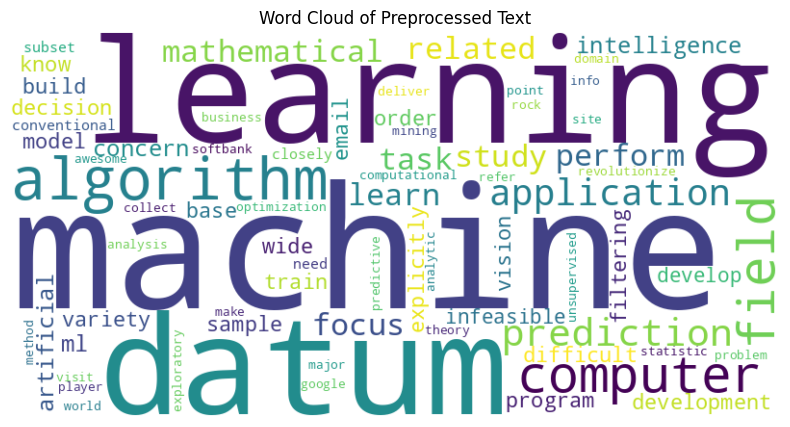

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the lemmatized tokens after stop word removal for the word cloud
# Join the list of tokens back into a single string

wordcloud_text = " ".join(spacy_lemmatized_tokens) # Using spaCy lemmatized tokens

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Preprocessed Text")
plt.show()


# Conclusion

Text preprocessing is an essential step in any NLP pipeline. It transforms raw, unstructured text into a clean and structured format suitable for analysis and training machine learning models.

- **NLTK** is a powerful and flexible library, great for learning and experimenting with various NLP techniques. It provides modular access to different algorithms and resources.
- **spaCy** is designed for efficiency and production use. Its integrated pipeline provides fast and accurate results for core tasks like tokenization, POS tagging, lemmatization, and NER.

Choosing between NLTK and spaCy often depends on the specific task, performance requirements, and ease of use needed for your project. Often, data scientists use a combination of tools based on their strengths.

By mastering these preprocessing techniques, you are well on your way to tackling more complex text mining and NLP challenges!

## References and Further Reading

- NLTK Documentation: https://www.nltk.org/
- spaCy Documentation: https://spacy.io/
- VADER Sentiment Analysis: https://www.nltk.org/howto/sentiment.html
- Scikit-learn Text Feature Extraction: https://scikit-learn.org/stable/modules/text_feature_extraction.html
